In [1]:

import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



# pandas display options
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.float_format", "{:.4f}".format)

# 0. Project Overview

In this project we will write code to analyse a dataset, clean and prepare it for a ML model-training that predicts a target value. Afterwards, a new business case will be applied for that model so that it can be useful in the real world!

Text will be written in a way that non technical people can understand it, in addition there will be a blog post.

In [2]:
path = "HHVBP_Provider_PerformanceYear_2023.csv"
data = pd.read_csv(path)


C:\Users\namee\AppData\Local\Temp\ipykernel_15980\626924566.py:2: DtypeWarning: Columns (36,38,60,62,108,110,132,134,156,158) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path)


# Business Understanding

The Home Health Value-Based Purchasing (HHVBP) Model is a program by Medicare (department of the government) to improve the quality of home health care. Agencies are scored based on their performance, and this score affects their payments. The Total Performance Score (TPS) is calculated using various measures, including:

- Measure Values: Actual performance metrics. e.g Care of patients, from 0 to 10

- Achievement Points: Points for meeting benchmarks. e.g  how well an agency performs relative to a benchmark, to other agencies, from 0 to 10

- Improvement Points: Points for showing progress over time. e.g based on their performance relative to their own past performance, from 0 to 10

- Care Points: The highest value of achievement points or improvement points., from 0 to 10

- Measure Weights: factorial measure weight e.g 1.5, helps to adjust a specific topic based on the importance, e.g medication more important than willigness to recommend, for the tps score, 

- Weighted Measure Points: Care Points multiplied by Measure Weights. points with a weighted measure, e.g measured value * factor. e.g measured value = 2 , weight = 1.5, weighted measure = 3

- Predicting the TPS (total predicted score)helps agencies understand how their performance impacts their payments and identify areas for improvement.computed from all other measures, from 0 to 100. We will train the model for this target value.

# 0.1 Methodology chapter 

In the following i will list all methods for analyzing and measuring the data.

- 

# 1. Exploratory data analysis

How does the data look like?


Here we will take an explorative analysis of how the data is shaped and which information is listed in the rows and columns. 

In a later step we will clean and prepare it, for now i will describe how the data looks like.

In [3]:
data.shape

(11969, 252)

Dataset have 11969 rows and 252 columns.

In [4]:
data.head(2)

CMS Certification Number (CCN) State  \
0                           17000    AL   
1                           17009    AL   

                                  Provider Name  \
0  State Of Alabama Department Of Public Health   
1      Eh Health Home Health Of Birmingham, Llc   

                                                      Provider Address  \
0  201 Monroe Street, The Rsa Tower,  Suite 1180, Montgomery, AL 36104   
1                   2970 Lorna Road, Ste 104, Vestavia Hills, AL 35216   

  Nationwide Cohort Footnote Nationwide Cohort  \
0     Larger-volume                        NaN   
1     Larger-volume                        NaN   

  Discharged to Community: PY HHA Data Period  \
0                                  12/31/2023   
1                                  12/31/2023   

  Footnote Discharged to Community: PY HHA Data Period  \
0                                                  NaN   
1                                                  NaN   

  Oral Medications: PY HHA Data Period  \
0                           12/31/2023   
1                           12/31/2023   

  Footnote Oral Medications: PY HHA Data Period Dyspnea: PY HHA Data Period  \
0                                           NaN                  12/31/2023   
1                                           NaN                  12/31/2023   

  Footnote Dyspnea: PY HHA Data Period TNC Mobility: PY HHA Data Period  \
0                                  NaN                       12/31/2023   
1                                  NaN                       12/31/2023   

  Footnote TNC Mobility: PY HHA Data Period TNC Self-Care: PY HHA Data Period  \
0                                       NaN                        12/31/2023   
1                                       NaN                        12/31/2023   

  Footnote TNC Self-Care: PY HHA Data Period ACH: PY HHA Data Period  \
0                                        NaN              12/31/2023   
1                                        NaN              12/31/2023   

  Footnote ACH: PY HHA Data Period ED Use: PY HHA Data Period  \
0                              NaN                 12/31/2023   
1                              NaN                 12/31/2023   

  Footnote ED Use: PY HHA Data Period Care of Patients: PY HHA Data Period  \
0                                 NaN                           12/31/2023   
1                                 NaN                           12/31/2023   

  Footnote Care of Patients: PY HHA Data Period  \
0                                           NaN   
1                                           NaN   

  Communication: PY HHA Data Period  \
0                        12/31/2023   
1                        12/31/2023   

  Footnote Communication: PY HHA Data Period  \
0                                        NaN   
1                                        NaN   

  Specific Care Issues: PY HHA Data Period  \
0                               12/31/2023   
1                               12/31/2023   

  Footnote Specific Care Issues: PY HHA Data Period  \
0                                               NaN   
1                                               NaN   

  Overall Rating: PY HHA Data Period  \
0                         12/31/2023   
1                         12/31/2023   

  Footnote Overall Rating: PY HHA Data Period  \
0                                         NaN   
1                                         NaN   

  Willingness to Recommend: PY HHA Data Period  \
0                                   12/31/2023   
1                                   12/31/2023   

  Footnote Willingness to Recommend: PY HHA Data Period  \
0                                                   NaN   
1                                                   NaN   

   Discharged to Community: PY HHA Measure Value  \
0                                        57.5340   
1                                        70.9650   

  Footnote Discharged to Community: PY HHA Measure Value  \
0 

In [5]:
data["Total Performance Score (TPS)"].isnull().sum()
#4809 are missing TPS values

4809

## Missing values
4809 rows have missing TPS values, which can be bad when it comes to a later model training because it is not holding information for the target value.

What datatypes each column has?

In [6]:
data.info(max_cols=data.shape[1])
# numeric values also shown  as object values somehow

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11969 entries, 0 to 11968
Data columns (total 252 columns):
 #    Column                                                          Non-Null Count  Dtype  
---   ------                                                          --------------  -----  
 0    CMS Certification Number (CCN)                                  11969 non-null  int64  
 1    State                                                           11969 non-null  object 
 2    Provider Name                                                   11969 non-null  object 
 3    Provider Address                                                11969 non-null  object 
 4    Nationwide Cohort                                               7160 non-null   object 
 5    Footnote Nationwide Cohort                                      4809 non-null   object 
 6    Discharged to Community: PY HHA Data Period                     7160 non-null   object 
 7    Footnote Discharged to Community: PY H

Many Columns with many missing values. Seems like there are also footnotes and other stuff which isnt neeeded for later purpose.

In [7]:
data.dtypes.value_counts()
#only 21 as numeric values

object     230
float64     21
int64        1
dtype: int64

# 
Some columns e.g. measured points are text datatype but not numeric.

In [8]:
data.isnull().sum()
#many missing values, delete nan rows later

CMS Certification Number (CCN)                                       0
State                                                                0
Provider Name                                                        0
Provider Address                                                     0
Nationwide Cohort                                                 4809
Footnote Nationwide Cohort                                        7160
Discharged to Community: PY HHA Data Period                       4809
Footnote Discharged to Community: PY HHA Data Period              7160
Oral Medications: PY HHA Data Period                              4809
Footnote Oral Medications: PY HHA Data Period                     7132
Dyspnea: PY HHA Data Period                                       4809
Footnote Dyspnea: PY HHA Data Period                              7107
TNC Mobility: PY HHA Data Period                                  4809
Footnote TNC Mobility: PY HHA Data Period                         7158
TNC Se

There are alot of misssing values inside the dataset! e.g 4809 for weighted measure points.

## How the data is distributed?

We will plot a histogram overview. All numeric values will be displayed as follows:
(A histogram is a type of bar chart that shows how many times different values appear in a dataset. It helps us see the pattern of the data)

- y-axis = amount of occuring values e.g. a column has 1400 occuring values the y-axis will have 0-1400 as scale
- x-axis shows the minimal and maximal value e.g the min value is 0 and the max value is 100, the x-axis will have a scale from 0 to 100

Example from all measured agencys it looks like there have an average TPS around 30, only.

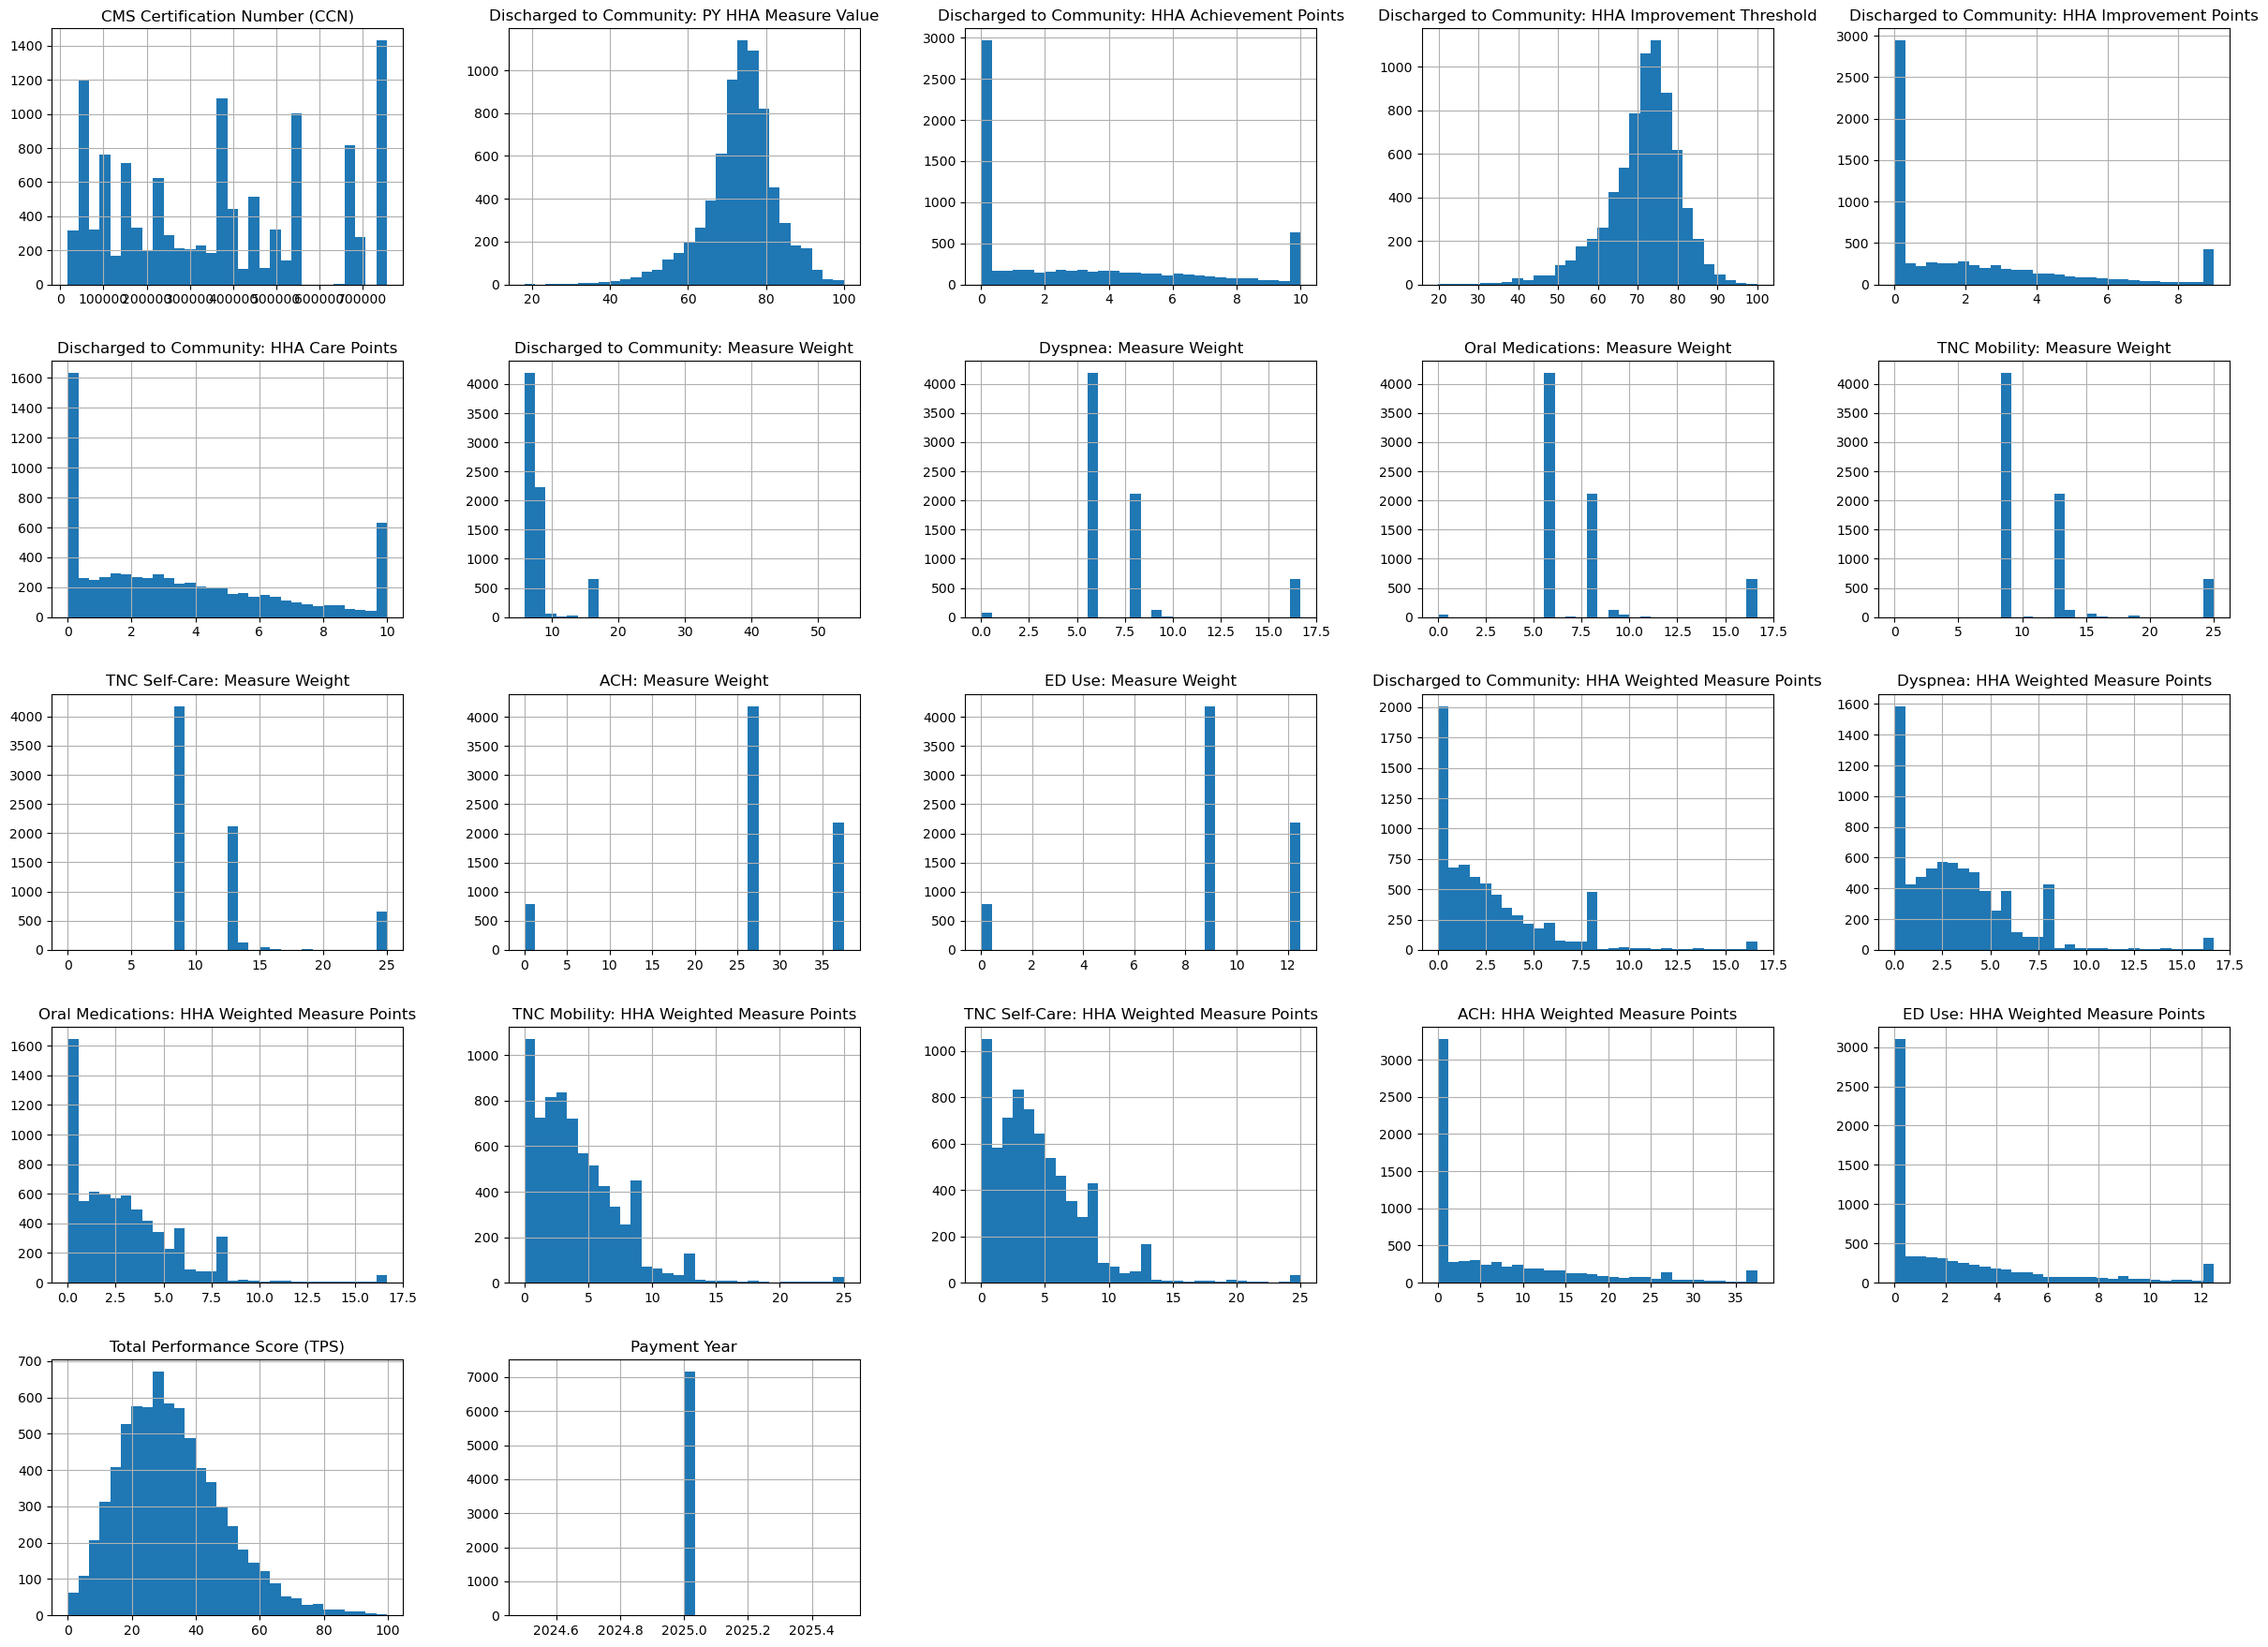

In [9]:


data.hist(figsize=(30, 22), bins=30)
plt.show()


## Correlations
To see if there are any correlations we will take a look on the heatmap to identify correlation values that are computed for us. A higher value e.g 0.8 indicates a positive correlation and can help later to watch out for important columns (training step. Scores range from -1 to +1.

Those columns may important because they make the trained model better, e.g. models accuracy and generalization depends of the selected data.

The target value later will be the Tps Score (how good or bad a care agency is measured from 0 to 100). The better a column correlates with the TPS Score the more useful the column can be later.

So we will watch out if there are data columns which can be helpfull and if there are data columns which looks uselles.

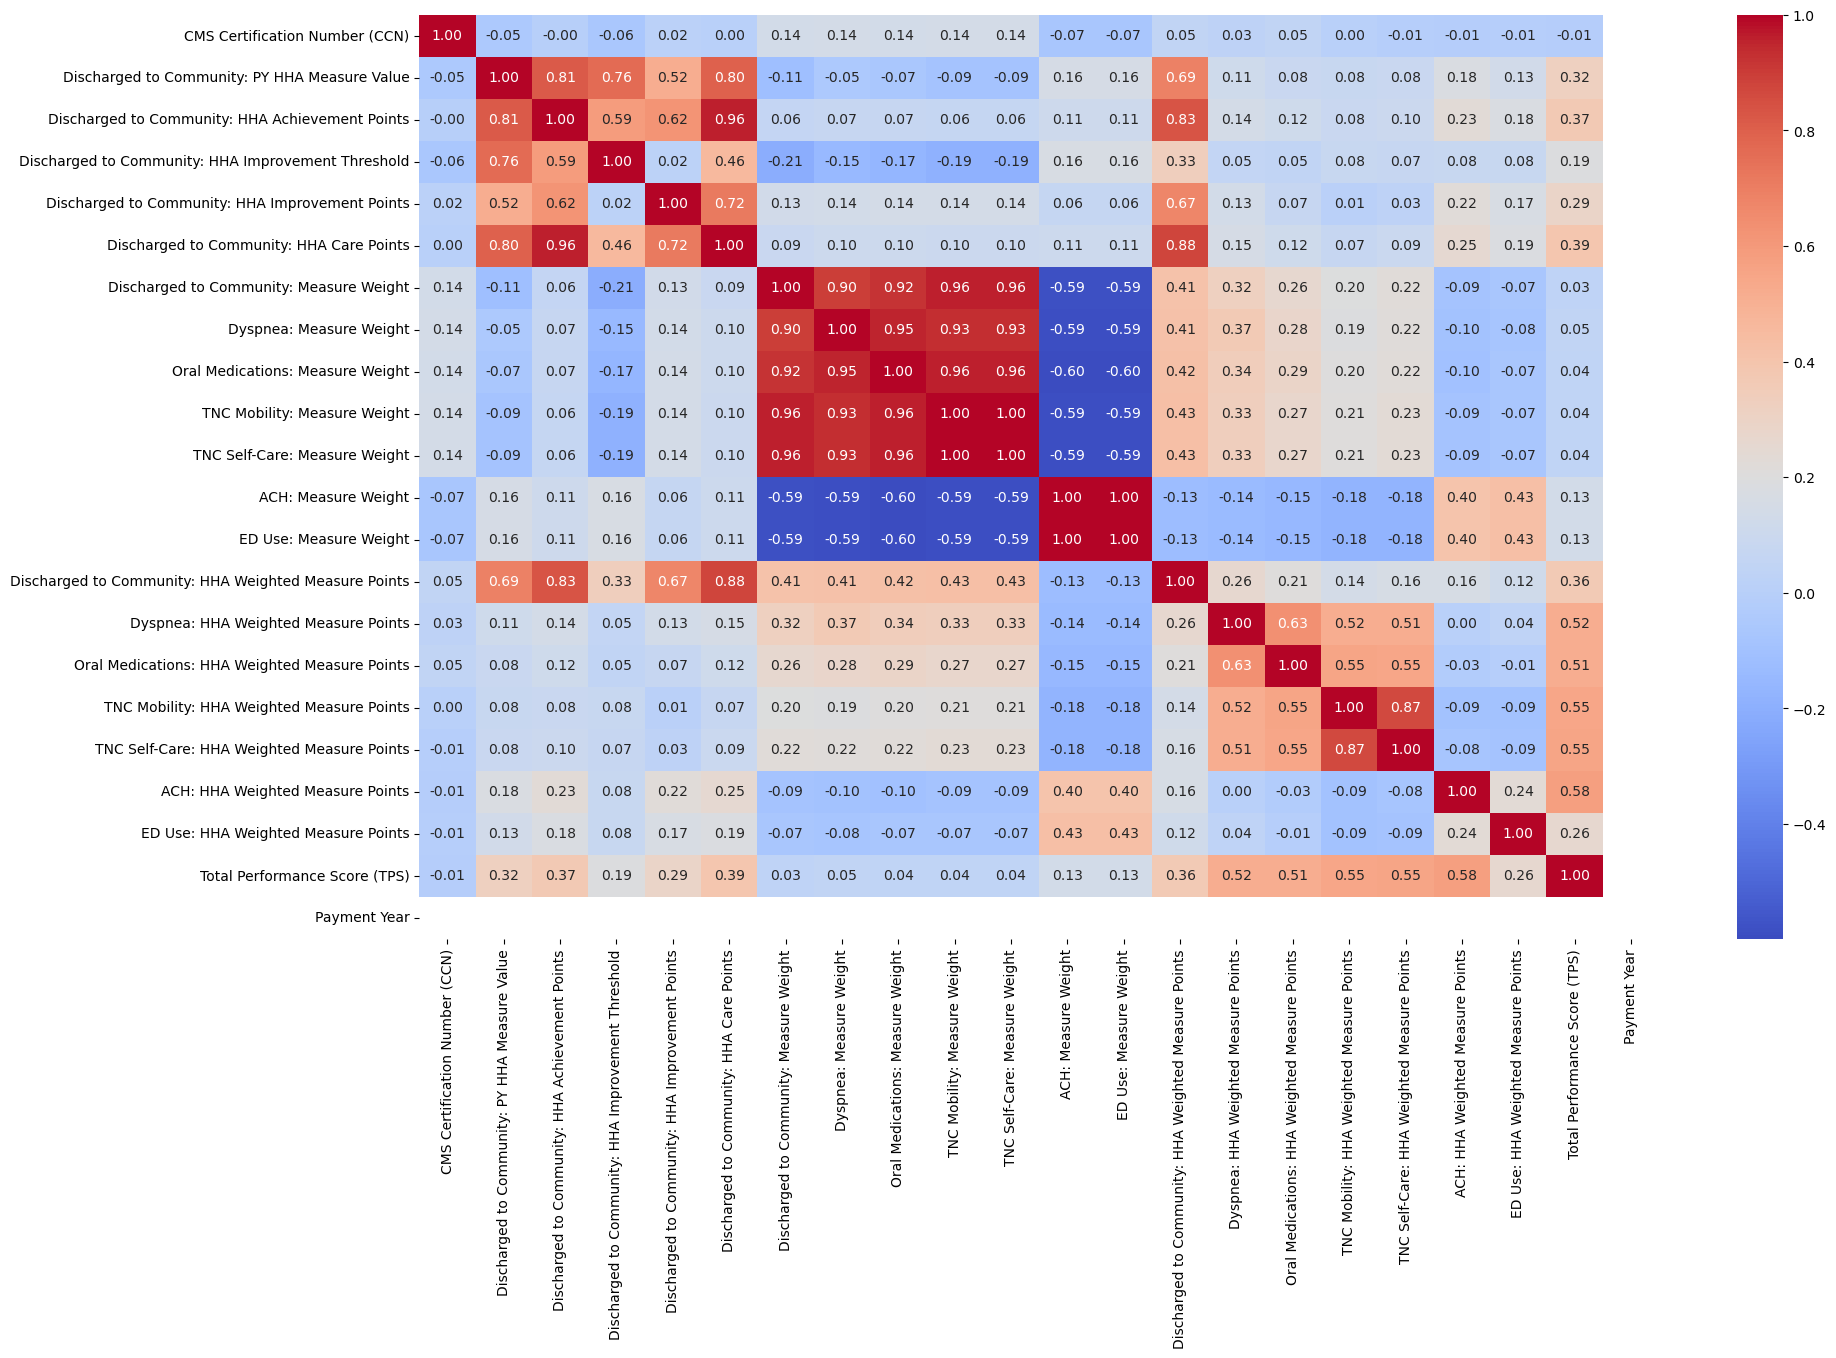

In [10]:

# get correlation map
df_numeric = data.select_dtypes(include=["number"])  # Keeps only int and float columns

# Compute correlation and plot heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


There are no clear correlations. It seems that some columns also have a very low linear correlation.

# 2. EDA Summary & Cleaning

Next, summarize the findings of your exploration. Explain whether the data needs to be cleaned based on your findings. If it does, perform the data cleaning. If not, move on with selecting the type of machine learning model that is appropriate for predicting from your data.

The original dataset had some bigger problems that we need to solve before we process it to our model training:

- many footnote columsn which are empty
- many missing values
- informational data like date time where data was created
- many numeric data which is datatype of text
- many TPS scores are NaN, missing value

TODO: 
To adjust and reduce the dataset, we will do the following now:

- change wrong datatypes to correct ones
- delete footnote columns
- drop rows with missing values
- drop not needed columns (e.g pure informational columns like datetime)



## Basic Cleaning

In [11]:
# change dtype to categorials
columns_to_convert = ['State', 'Provider Name', 'Provider Address','Nationwide Cohort']
for col in columns_to_convert:
    data[col] = data[col].astype('category')


data.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11969 entries, 0 to 11968
Data columns (total 252 columns):
 #    Column                                                          Dtype   
---   ------                                                          -----   
 0    CMS Certification Number (CCN)                                  int64   
 1    State                                                           category
 2    Provider Name                                                   category
 3    Provider Address                                                category
 4    Nationwide Cohort                                               category
 5    Footnote Nationwide Cohort                                      object  
 6    Discharged to Community: PY HHA Data Period                     object  
 7    Footnote Discharged to Community: PY HHA Data Period            object  
 8    Oral Medications: PY HHA Data Period                            object  
 9    Footnote Oral M

In [12]:
# change dtypes
#text to numeric

columns_to_convert = [col for col in data.columns if any(keyword in col for keyword in ['Measure Value', 'Achievement Points', 'Measure Weight', 'Care Points', 'Improvement Points'])]
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric, errors='coerce')

data.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11969 entries, 0 to 11968
Data columns (total 252 columns):
 #    Column                                                          Dtype   
---   ------                                                          -----   
 0    CMS Certification Number (CCN)                                  int64   
 1    State                                                           category
 2    Provider Name                                                   category
 3    Provider Address                                                category
 4    Nationwide Cohort                                               category
 5    Footnote Nationwide Cohort                                      object  
 6    Discharged to Community: PY HHA Data Period                     object  
 7    Footnote Discharged to Community: PY HHA Data Period            object  
 8    Oral Medications: PY HHA Data Period                            object  
 9    Footnote Oral M

In [13]:
#to many columsn wiht footnote , delete that
#drop all footnotes in data set not necessary now
#reduce dataset to 128 columns wihtotu footnote

df = data.loc[:, ~data.columns.str.contains("footnote", case=False)]


df.shape
#reduced column size


(11969, 128)

In [14]:
df1 = df.dropna(subset=["Total Performance Score (TPS)"])
df1.shape
#reduced the data set from missing TPS score values by apprx 45%

(7160, 128)

We drop all datetime realted columns because they give only information when the data was collected etc!
Then the treshold columns get deleted because they hold only general information.

After the column cleaning we stay with these:
- achievement points, compare if there is incrase in companys quality
- improvement points, compare if company is increas quality compared to other companys on its cohort leve
- weightes measure points, measure values weighted for later tps score computation
- total tps score

In [15]:
# drop only informational cols



#drop year datetime cols
# Assuming your dataframe is named df
# year,period,baseline,threshold,measure weight, care points,measure value, include in tps
columns_to_drop = [col for col in df1.columns if 'Year' in col or 'Period' in col or 'Baseline' in col or 'Threshold' in col or 'Measure Value' in col or 'Included in TPS' in col or 'Payment Year' in col or 'Measure Weight' in col]

# Dropping the columns
df2 = df1.drop(columns=columns_to_drop)



df2.head(2)

CMS Certification Number (CCN) State  \
0                           17000    AL   
1                           17009    AL   

                                  Provider Name  \
0  State Of Alabama Department Of Public Health   
1      Eh Health Home Health Of Birmingham, Llc   

                                                      Provider Address  \
0  201 Monroe Street, The Rsa Tower,  Suite 1180, Montgomery, AL 36104   
1                   2970 Lorna Road, Ste 104, Vestavia Hills, AL 35216   

  Nationwide Cohort  Discharged to Community: HHA Achievement Points  \
0     Larger-volume                                           0.0000   
1     Larger-volume                                           0.0000   

   Dyspnea: HHA Achievement Points  Oral Medications: HHA Achievement Points  \
0                           0.0000                                    2.0620   
1                           5.0170                                    5.4570   

   TNC Mobility: HHA Achievement Points  \
0                                0.2620   
1                                5.6930   

   TNC Self-Care: HHA Achievement Points  ACH: HHA Achievement Points  \
0                                 0.0000                       2.2430   
1                                 7.7210                       0.0000   

   ED Use: HHA Achievement Points  Care of Patients: HHA Achievement Points  \
0                          0.0000                                    3.0920   
1                          2.9060                                    4.9310   

   Communication: HHA Achievement Points  \
0                                 4.0670   
1                                 4.6380   

   Specific Care Issues: HHA Achievement Points  \
0                                        7.2870   
1                                        7.8480   

   Overall Rating: HHA Achievement Points  \
0                                  5.5010   
1                                  7.9870   

   Willingness to Recommend: HHA Achievement Points  \
0                                            4.2970   
1                                            5.9170   

   Discharged to Community: HHA Improvement Points  \
0                                           0.0000   
1                                           0.5310   

   Dyspnea: HHA Improvement Points  Oral Medications: HHA Improvement Points  \
0                           1.6950                                    1.9070   
1                           4.1760                                    3.4470   

   TNC Mobility: HHA Improvement Points  \
0                                1.2770   
1                                2.5310   

   TNC Self-Care: HHA Improvement Points  ACH: HHA Improvement Points  \
0                                 0.7410                       3.5020   
1                                 5.1740                       1.1820   

   ED Use: HHA Improvement Points  Care of Patients: HHA Improvement Points  \
0                          0.0000                                    0.0000   
1                          0.0000                                    1.7750   

   Communication: HHA Improvement Points  \
0                                 0.0820   
1                                 0.0000   

   Specific Care Issues: HHA Improvement Points  \
0                                        1.9240   
1                                        6.0930   

   Overall Rating: HHA Improvement Points  \
0                                  0.0000   
1                                  3.3960   

   Willingness to Recommend: HHA Improvement Points  \
0                                            0.0000   
1                                            2.6840   

   Discharged to Community: HHA Care Points  Dyspnea: HHA Care Points  \
0                                    0.0000                    1.6950   
1                                    0.5310                    5.0170   

   Oral Medications: HHA Care Points  TNC Mobility: HHA Care

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7160 entries, 0 to 11235
Data columns (total 55 columns):
 #   Column                                                 Non-Null Count  Dtype   
---  ------                                                 --------------  -----   
 0   CMS Certification Number (CCN)                         7160 non-null   int64   
 1   State                                                  7160 non-null   category
 2   Provider Name                                          7160 non-null   category
 3   Provider Address                                       7160 non-null   category
 4   Nationwide Cohort                                      7160 non-null   category
 5   Discharged to Community: HHA Achievement Points        7160 non-null   float64 
 6   Dyspnea: HHA Achievement Points                        7078 non-null   float64 
 7   Oral Medications: HHA Achievement Points               7120 non-null   float64 
 8   TNC Mobility: HHA Achievement Points 

## Clean Categorials

To consider deletion of categorials we need to take a small look in the distribution and averages of that values to excldue or include them to the future ML model.

<Figure size 2000x1200 with 0 Axes>

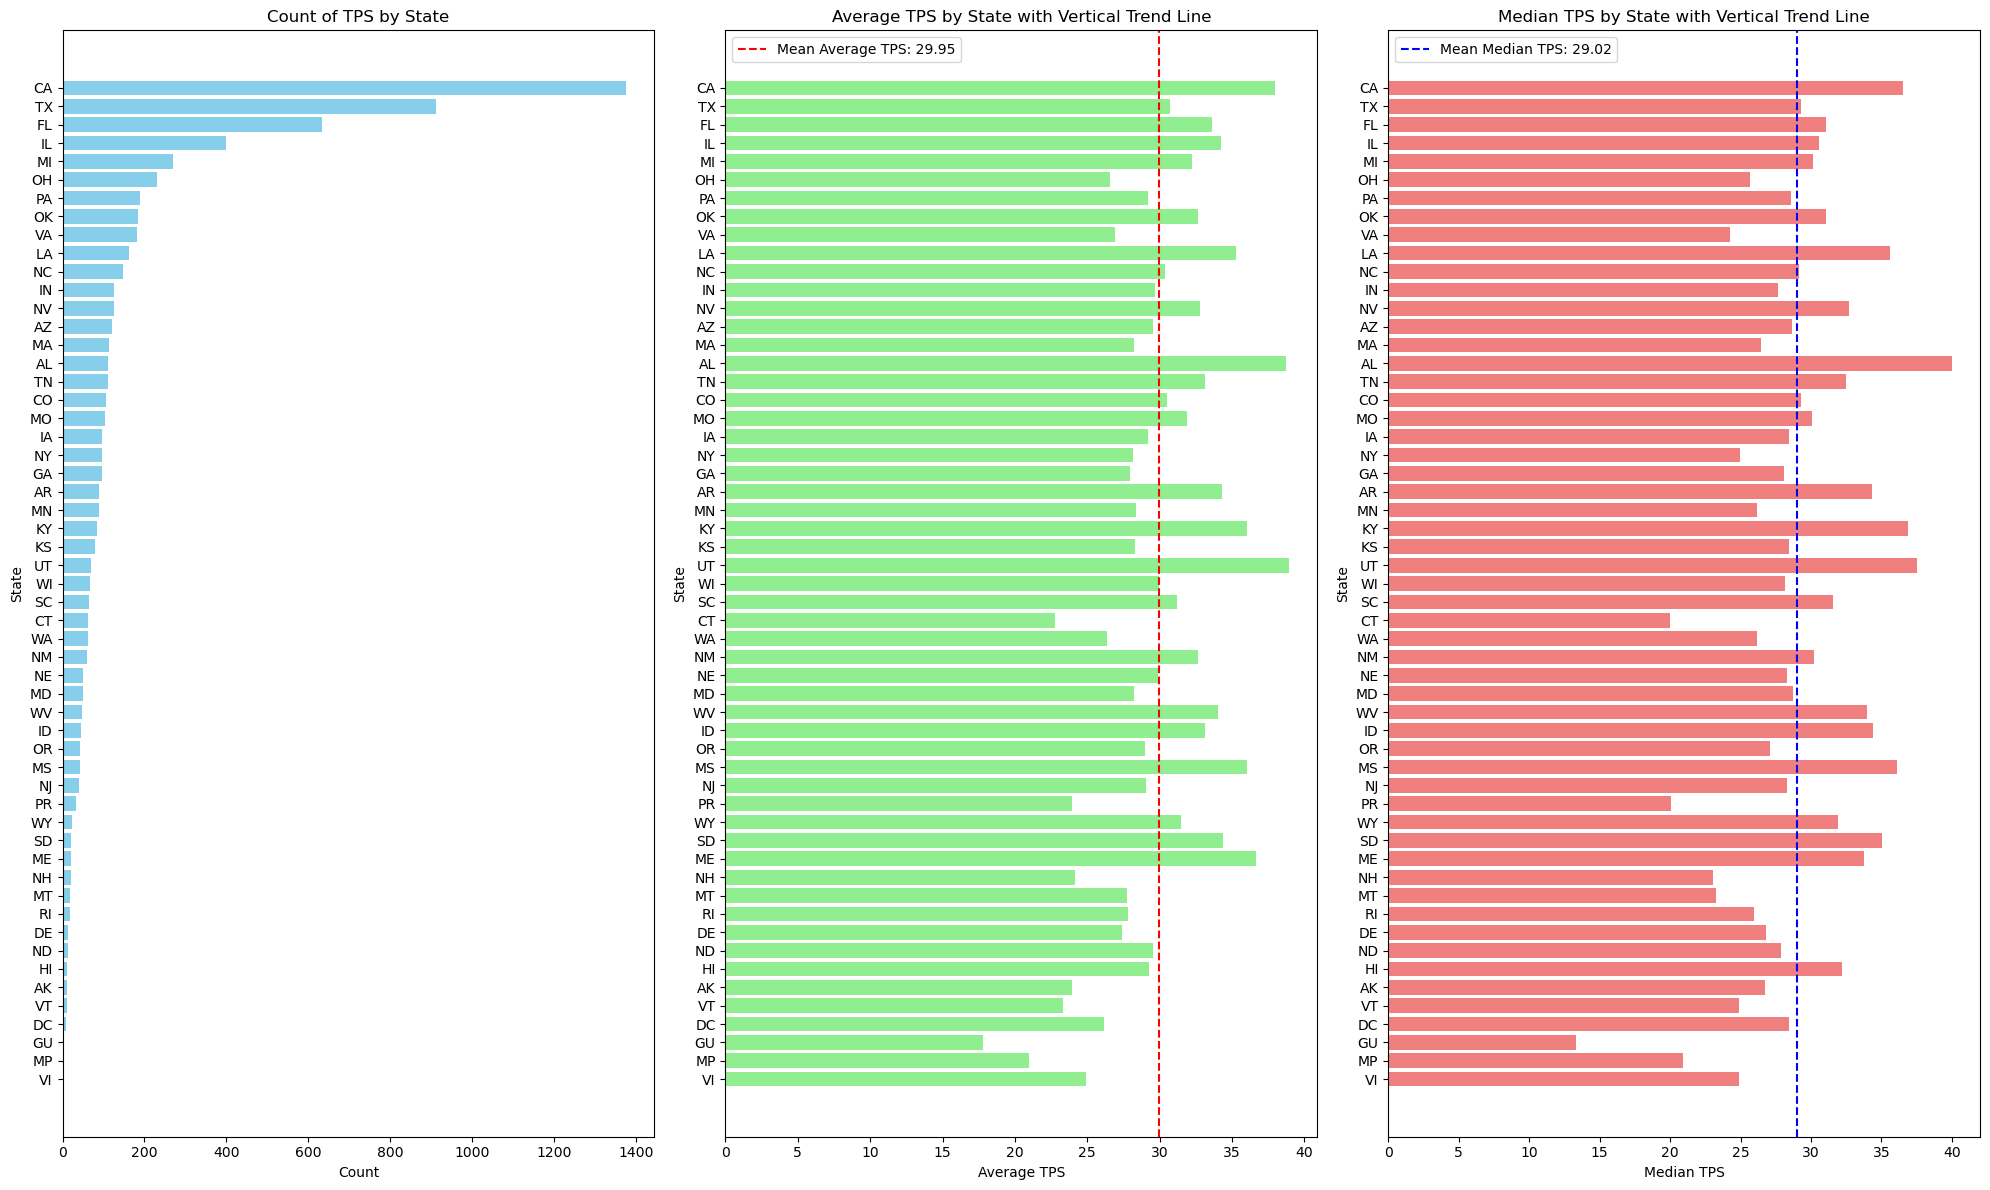

In [17]:
# Ensure 'Total Performance Score (TPS)' is numeric
df2['Total Performance Score (TPS)'] = pd.to_numeric(df2['Total Performance Score (TPS)'], errors='coerce')

# Drop rows with missing TPS values
df2 = df2.dropna(subset=['Total Performance Score (TPS)'])

# Group by 'State' and calculate count, mean, and median for 'Total Performance Score (TPS)'
state_summary = df2.groupby('State')['Total Performance Score (TPS)'].agg(
    count='size',
    average='mean',
    median='median'
).reset_index().sort_values(by="count", ascending=True)

# Set the figure size
plt.figure(figsize=(20, 12))

# Create subplots for count, average, and median
fig, axes = plt.subplots(1, 3, figsize=(20, 12))

# Plot count
axes[0].barh(state_summary['State'], state_summary['count'], color='skyblue')
axes[0].set_title('Count of TPS by State')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('State')

# Plot average TPS with vertical trend line
axes[1].barh(state_summary['State'], state_summary['average'], color='lightgreen')
axes[1].set_title('Average TPS by State with Vertical Trend Line')
axes[1].set_xlabel('Average TPS')
axes[1].set_ylabel('State')
# Add vertical line at the mean of average TPS
mean_average = state_summary['average'].mean()
axes[1].axvline(x=mean_average, color='red', linestyle='--', label=f'Mean Average TPS: {mean_average:.2f}')
axes[1].legend()

# Plot median TPS with vertical trend line
axes[2].barh(state_summary['State'], state_summary['median'], color='lightcoral')
axes[2].set_title('Median TPS by State with Vertical Trend Line')
axes[2].set_xlabel('Median TPS')
axes[2].set_ylabel('State')
# Add vertical line at the mean of median TPS
mean_median = state_summary['median'].mean()
axes[2].axvline(x=mean_median, color='blue', linestyle='--', label=f'Mean Median TPS: {mean_median:.2f}')
axes[2].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [18]:
unique_cohorts = df2['Nationwide Cohort'].unique()
print("Unique Nationwide Cohorts:", unique_cohorts)

Unique Nationwide Cohorts: ['Larger-volume', 'Smaller-volume']
Categories (2, object): ['Larger-volume', 'Smaller-volume']


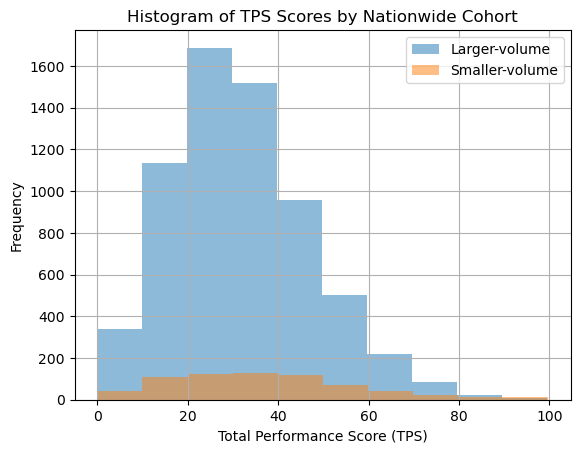

In [19]:
# Group data by 'Nationwide Cohort' and plot histograms
data.groupby('Nationwide Cohort')['Total Performance Score (TPS)'].hist(alpha=0.5, legend=True)
plt.xlabel('Total Performance Score (TPS)')
plt.ylabel('Frequency')
plt.title('Histogram of TPS Scores by Nationwide Cohort')
plt.show()


In [20]:
df3 = df2.iloc[:, 1:-1]
df3.head(1)

State                                 Provider Name  \
0    AL  State Of Alabama Department Of Public Health   

                                                      Provider Address  \
0  201 Monroe Street, The Rsa Tower,  Suite 1180, Montgomery, AL 36104   

  Nationwide Cohort  Discharged to Community: HHA Achievement Points  \
0     Larger-volume                                           0.0000   

   Dyspnea: HHA Achievement Points  Oral Medications: HHA Achievement Points  \
0                           0.0000                                    2.0620   

   TNC Mobility: HHA Achievement Points  \
0                                0.2620   

   TNC Self-Care: HHA Achievement Points  ACH: HHA Achievement Points  \
0                                 0.0000                       2.2430   

   ED Use: HHA Achievement Points  Care of Patients: HHA Achievement Points  \
0                          0.0000                                    3.0920   

   Communication: HHA Achievement Points  \
0                                 4.0670   

   Specific Care Issues: HHA Achievement Points  \
0                                        7.2870   

   Overall Rating: HHA Achievement Points  \
0                                  5.5010   

   Willingness to Recommend: HHA Achievement Points  \
0                                            4.2970   

   Discharged to Community: HHA Improvement Points  \
0                                           0.0000   

   Dyspnea: HHA Improvement Points  Oral Medications: HHA Improvement Points  \
0                           1.6950                                    1.9070   

   TNC Mobility: HHA Improvement Points  \
0                                1.2770   

   TNC Self-Care: HHA Improvement Points  ACH: HHA Improvement Points  \
0                                 0.7410                       3.5020   

   ED Use: HHA Improvement Points  Care of Patients: HHA Improvement Points  \
0                          0.0000                                    0.0000   

   Communication: HHA Improvement Points  \
0                                 0.0820   

   Specific Care Issues: HHA Improvement Points  \
0                                        1.9240   

   Overall Rating: HHA Improvement Points  \
0                                  0.0000   

   Willingness to Recommend: HHA Improvement Points  \
0                                            0.0000   

   Discharged to Community: HHA Care Points  Dyspnea: HHA Care Points  \
0                                    0.0000                    1.6950   

   Oral Medications: HHA Care Points  TNC Mobility: HHA Care Points  \
0                             2.0620                         1.2770   

   TNC Self-Care: HHA Care Points  ACH: HHA Care Points  \
0                          0.7410                3.5020   

   ED Use: HHA Care Points  Care of Patients: HHA Care Points  \
0                   0.0000                             3.0920   

   Communication: HHA Care Points  Specific Care Issues: HHA Care Points  \
0                          4.0670                                 7.2870   

   Overall Rating: HHA Care Points  Willingness to Recommend: HHA Care Points  \
0                           5.5010                                     4.2970   

   Discharged to Community: HHA Weighted Measure Points  \
0                                                0.0000   

   Dyspnea: HHA Weighted Measure Points  \
0                                0.9890   

   Oral Medications: HHA Weighted Measure Points  \
0                                         1.2030   

   TNC Mobility: HHA Weighted Measure Points  \
0                                     1.1170   

   TNC Self-Care: HHA Weighted Measure Points  \
0                                      0.6480   

   ACH: HHA Weighted Measure Points  ED Use: HHA Weighted Measure Points  \
0                            9.1930                               0.0000   

  Care of Patients: HHA Weighted Measure Points  \
0                    

In [21]:
# Convert object values to numeric
columns_to_convert = [
    'Care of Patients: HHA Weighted Measure Points',
    'Communication: HHA Weighted Measure Points',
    'Specific Care Issues: HHA Weighted Measure Points',
    'Overall Rating: HHA Weighted Measure Points',
    'Willingness to Recommend: HHA Weighted Measure Points'
]

# Apply pd.to_numeric to convert the columns to float type
for column in columns_to_convert:
    df3[column] = pd.to_numeric(df3[column], errors='coerce')

df3.head(1)

State                                 Provider Name  \
0    AL  State Of Alabama Department Of Public Health   

                                                      Provider Address  \
0  201 Monroe Street, The Rsa Tower,  Suite 1180, Montgomery, AL 36104   

  Nationwide Cohort  Discharged to Community: HHA Achievement Points  \
0     Larger-volume                                           0.0000   

   Dyspnea: HHA Achievement Points  Oral Medications: HHA Achievement Points  \
0                           0.0000                                    2.0620   

   TNC Mobility: HHA Achievement Points  \
0                                0.2620   

   TNC Self-Care: HHA Achievement Points  ACH: HHA Achievement Points  \
0                                 0.0000                       2.2430   

   ED Use: HHA Achievement Points  Care of Patients: HHA Achievement Points  \
0                          0.0000                                    3.0920   

   Communication: HHA Achievement Points  \
0                                 4.0670   

   Specific Care Issues: HHA Achievement Points  \
0                                        7.2870   

   Overall Rating: HHA Achievement Points  \
0                                  5.5010   

   Willingness to Recommend: HHA Achievement Points  \
0                                            4.2970   

   Discharged to Community: HHA Improvement Points  \
0                                           0.0000   

   Dyspnea: HHA Improvement Points  Oral Medications: HHA Improvement Points  \
0                           1.6950                                    1.9070   

   TNC Mobility: HHA Improvement Points  \
0                                1.2770   

   TNC Self-Care: HHA Improvement Points  ACH: HHA Improvement Points  \
0                                 0.7410                       3.5020   

   ED Use: HHA Improvement Points  Care of Patients: HHA Improvement Points  \
0                          0.0000                                    0.0000   

   Communication: HHA Improvement Points  \
0                                 0.0820   

   Specific Care Issues: HHA Improvement Points  \
0                                        1.9240   

   Overall Rating: HHA Improvement Points  \
0                                  0.0000   

   Willingness to Recommend: HHA Improvement Points  \
0                                            0.0000   

   Discharged to Community: HHA Care Points  Dyspnea: HHA Care Points  \
0                                    0.0000                    1.6950   

   Oral Medications: HHA Care Points  TNC Mobility: HHA Care Points  \
0                             2.0620                         1.2770   

   TNC Self-Care: HHA Care Points  ACH: HHA Care Points  \
0                          0.7410                3.5020   

   ED Use: HHA Care Points  Care of Patients: HHA Care Points  \
0                   0.0000                             3.0920   

   Communication: HHA Care Points  Specific Care Issues: HHA Care Points  \
0                          4.0670                                 7.2870   

   Overall Rating: HHA Care Points  Willingness to Recommend: HHA Care Points  \
0                           5.5010                                     4.2970   

   Discharged to Community: HHA Weighted Measure Points  \
0                                                0.0000   

   Dyspnea: HHA Weighted Measure Points  \
0                                0.9890   

   Oral Medications: HHA Weighted Measure Points  \
0                                         1.2030   

   TNC Mobility: HHA Weighted Measure Points  \
0                                     1.1170   

   TNC Self-Care: HHA Weighted Measure Points  \
0                                      0.6480   

   ACH: HHA Weighted Measure Points  ED Use: HHA Weighted Measure Points  \
0                            9.1930                               0.0000   

   Care of Patients: HHA Weighted Measure Points  \
0                   

In [22]:

# create dummy variables for state 
df4 = pd.get_dummies(df3, columns=['State'], drop_first=True)
df_wState = df4
df_clean = df4.iloc[:, 3:]
# to binary
columns_to_convert = [col for col in df_clean.columns if col.startswith("State_")]
df_clean[columns_to_convert] = df_clean[columns_to_convert].astype(int)


df_clean.head(1)


Discharged to Community: HHA Achievement Points  \
0                                           0.0000   

   Dyspnea: HHA Achievement Points  Oral Medications: HHA Achievement Points  \
0                           0.0000                                    2.0620   

   TNC Mobility: HHA Achievement Points  \
0                                0.2620   

   TNC Self-Care: HHA Achievement Points  ACH: HHA Achievement Points  \
0                                 0.0000                       2.2430   

   ED Use: HHA Achievement Points  Care of Patients: HHA Achievement Points  \
0                          0.0000                                    3.0920   

   Communication: HHA Achievement Points  \
0                                 4.0670   

   Specific Care Issues: HHA Achievement Points  \
0                                        7.2870   

   Overall Rating: HHA Achievement Points  \
0                                  5.5010   

   Willingness to Recommend: HHA Achievement Points  \
0                                            4.2970   

   Discharged to Community: HHA Improvement Points  \
0                                           0.0000   

   Dyspnea: HHA Improvement Points  Oral Medications: HHA Improvement Points  \
0                           1.6950                                    1.9070   

   TNC Mobility: HHA Improvement Points  \
0                                1.2770   

   TNC Self-Care: HHA Improvement Points  ACH: HHA Improvement Points  \
0                                 0.7410                       3.5020   

   ED Use: HHA Improvement Points  Care of Patients: HHA Improvement Points  \
0                          0.0000                                    0.0000   

   Communication: HHA Improvement Points  \
0                                 0.0820   

   Specific Care Issues: HHA Improvement Points  \
0                                        1.9240   

   Overall Rating: HHA Improvement Points  \
0                                  0.0000   

   Willingness to Recommend: HHA Improvement Points  \
0                                            0.0000   

   Discharged to Community: HHA Care Points  Dyspnea: HHA Care Points  \
0                                    0.0000                    1.6950   

   Oral Medications: HHA Care Points  TNC Mobility: HHA Care Points  \
0                             2.0620                         1.2770   

   TNC Self-Care: HHA Care Points  ACH: HHA Care Points  \
0                          0.7410                3.5020   

   ED Use: HHA Care Points  Care of Patients: HHA Care Points  \
0                   0.0000                             3.0920   

   Communication: HHA Care Points  Specific Care Issues: HHA Care Points  \
0                          4.0670                                 7.2870   

   Overall Rating: HHA Care Points  Willingness to Recommend: HHA Care Points  \
0                           5.5010                                     4.2970   

   Discharged to Community: HHA Weighted Measure Points  \
0                                                0.0000   

   Dyspnea: HHA Weighted Measure Points  \
0                                0.9890   

   Oral Medications: HHA Weighted Measure Points  \
0                                         1.2030   

   TNC Mobility: HHA Weighted Measure Points  \
0                                     1.1170   

   TNC Self-Care: HHA Weighted Measure Points  \
0                                      0.6480   

   ACH: HHA Weighted Measure Points  ED Use: HHA Weighted Measure Points  \
0                            9.1930                               0.0000   

   Care of Patients: HHA Weighted Measure Points  \
0                                         1.8550   

   Communication: HHA Weighted Measure Points  \
0                                      2.4400   

   Specific Care Issues: HHA Weighted Measure Points  \
0                                             4.3720   

   Overall Rating: HHA Weighted Measure Points  \
0     

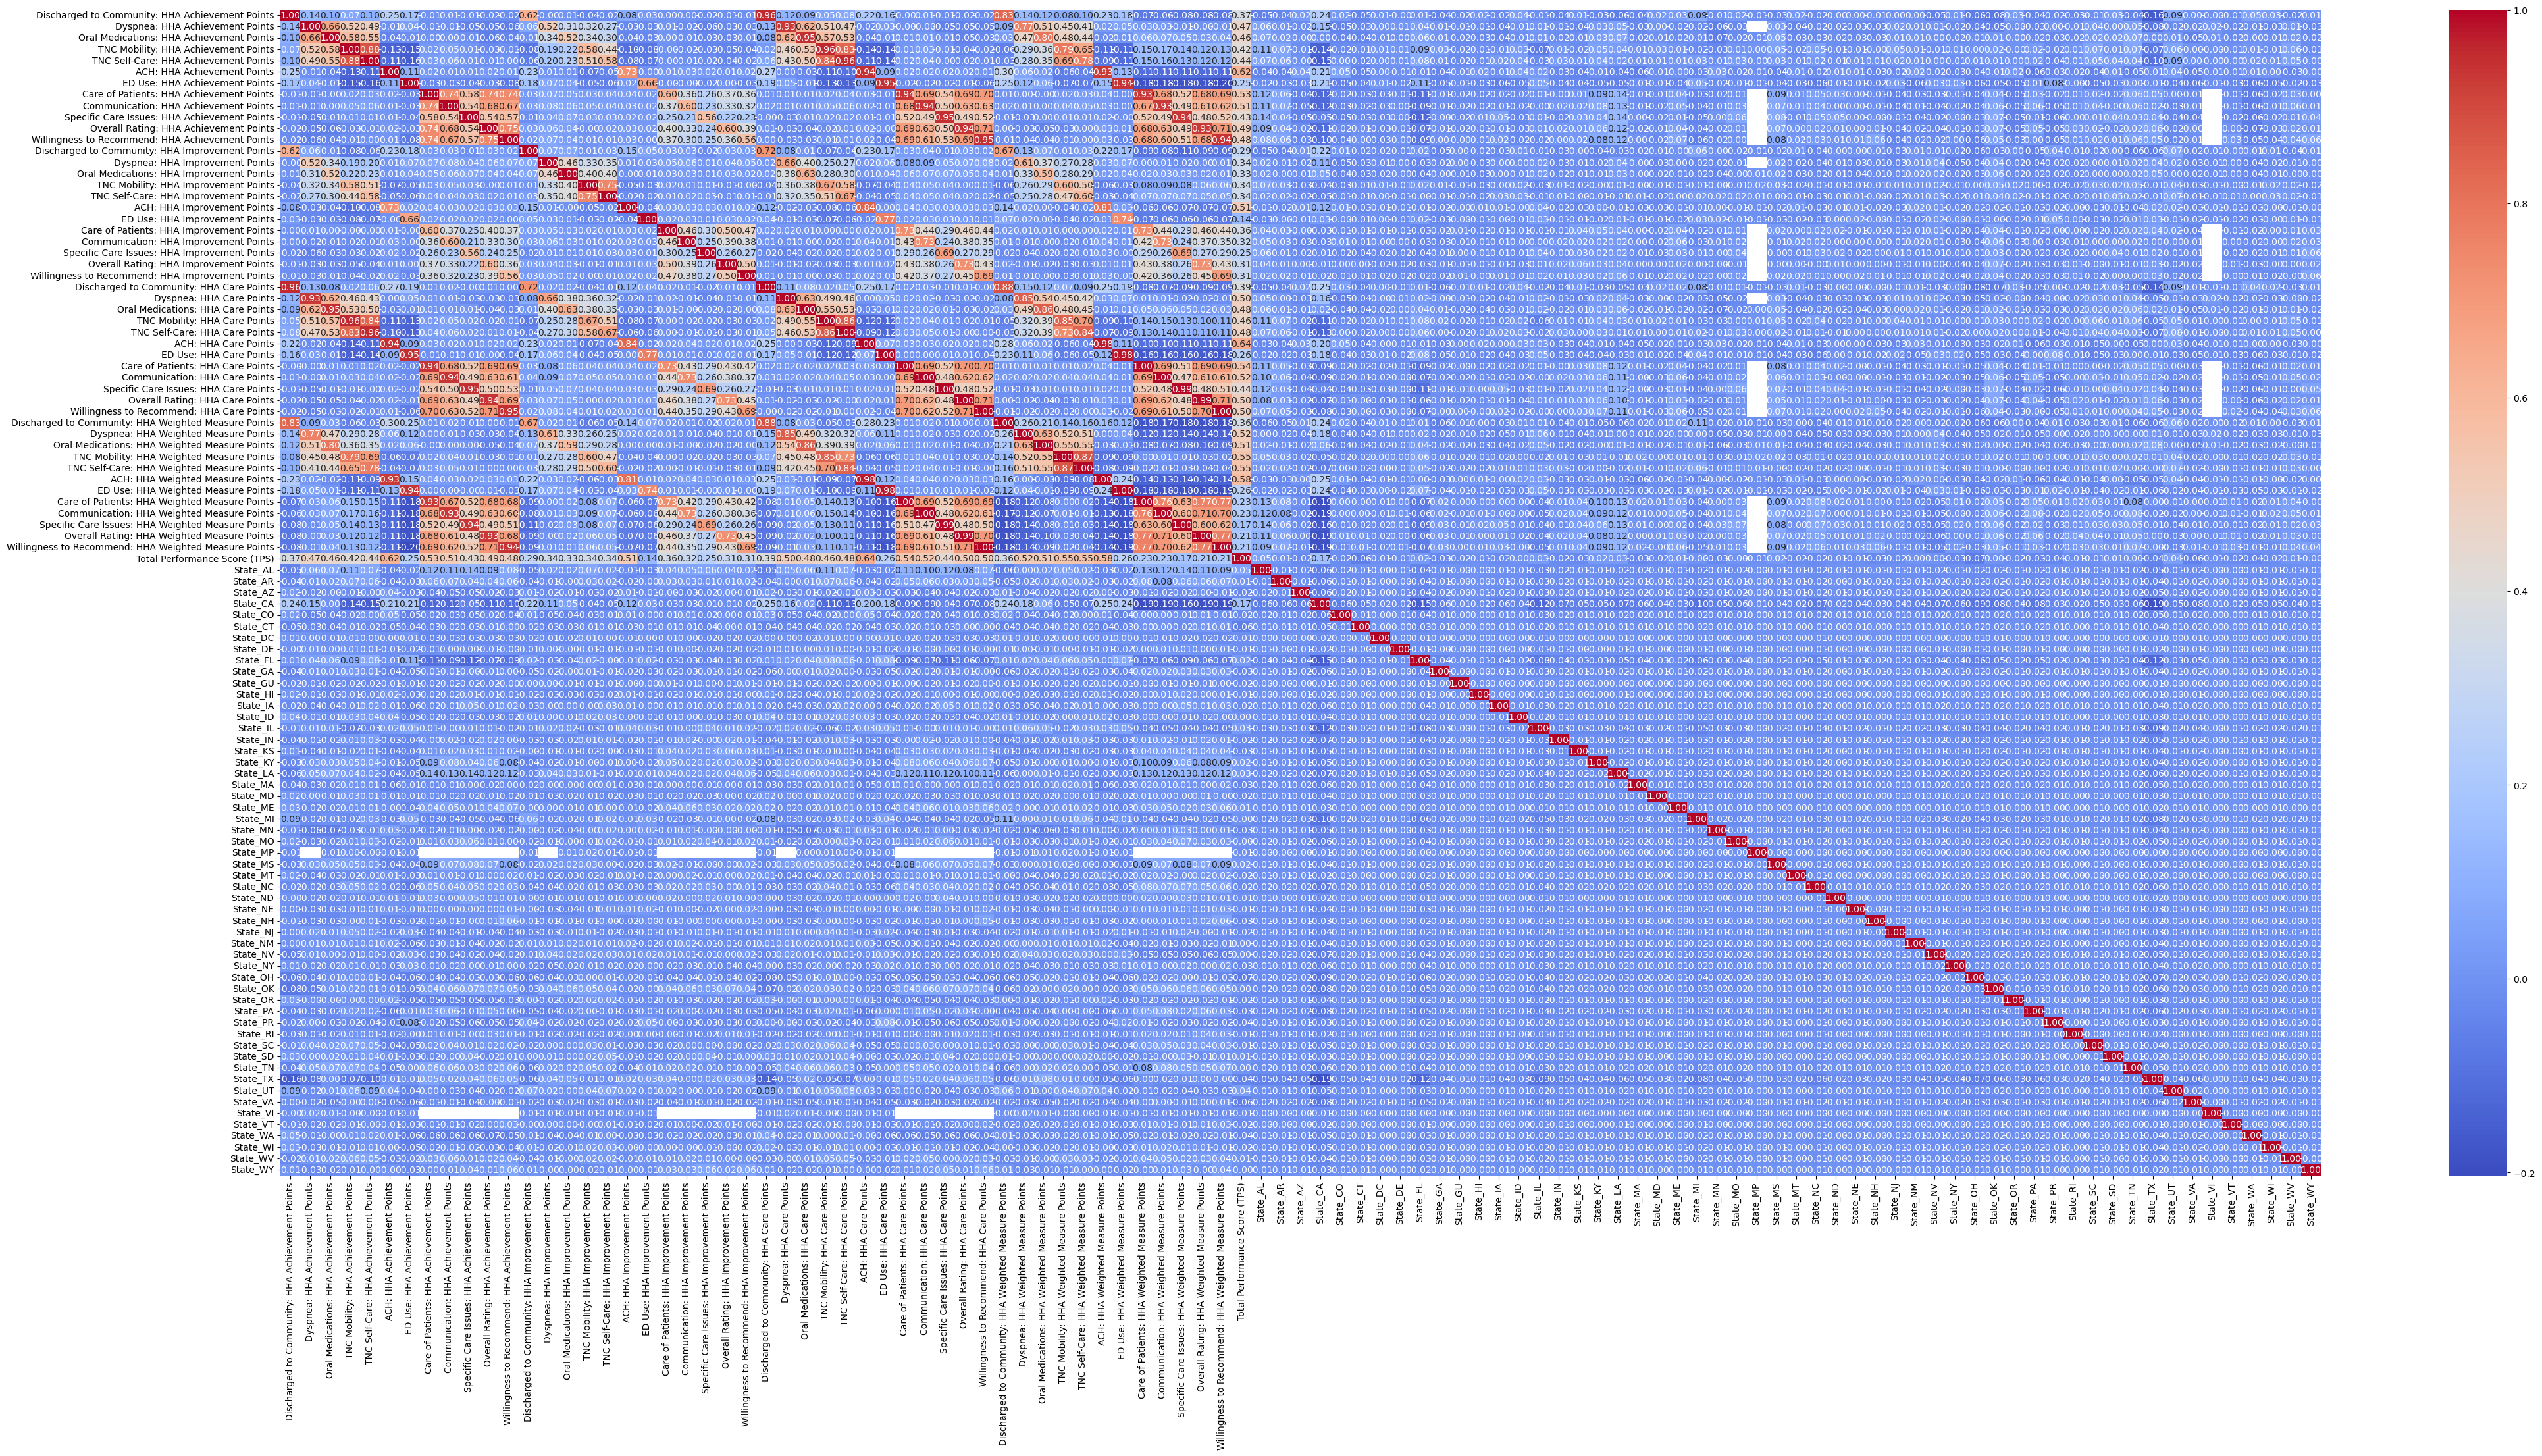

In [23]:
# get correlation map
df_numeric = df_clean.select_dtypes(include=["number"])  # Keeps only int and float columns

# Compute correlation and plot heatmap
plt.figure(figsize=(50, 23))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

based on the correlation map there are no significant correlation . We run a chi test to see if there is more under the hood. Especially for the state values.

State column shows different average scorings so we create dummy variables to let the later model work with it. We take an eye on it and look if it makes any difference later in the metric valuation. Based on the chi test we will filter out all non significant cols for state by 0.05. As they may affect the model training later.


In [24]:
states_to_drop = [
    'State_AL', 'State_AR', 'State_AZ', 'State_CA', 'State_CO', 'State_DC',
    'State_FL', 'State_GA', 'State_HI', 'State_IA', 'State_ID', 'State_IL',
    'State_IN', 'State_KS', 'State_LA', 'State_MA', 'State_MI', 'State_MN',
    'State_MO', 'State_MS', 'State_NC', 'State_NE', 'State_NH', 'State_NJ',
    'State_NM', 'State_NV', 'State_NY', 'State_OH', 'State_OK', 'State_OR',
    'State_PA', 'State_SC', 'State_TN', 'State_TX', 'State_UT', 'State_VA',
    'State_VT', 'State_WA', 'State_WI', 'State_WV', 'State_WY'
]


df6 = df_clean.drop(columns=states_to_drop)
df6.head(5)

Discharged to Community: HHA Achievement Points  \
0                                           0.0000   
1                                           0.0000   
2                                           4.4110   
3                                           0.6010   
4                                           0.2100   

   Dyspnea: HHA Achievement Points  Oral Medications: HHA Achievement Points  \
0                           0.0000                                    2.0620   
1                           5.0170                                    5.4570   
2                           3.6620                                    5.3170   
3                           6.8170                                    6.4520   
4                           7.7870                                    6.6620   

   TNC Mobility: HHA Achievement Points  \
0                                0.2620   
1                                5.6930   
2                               10.0000   
3                                7.9780   
4                                5.0190   

   TNC Self-Care: HHA Achievement Points  ACH: HHA Achievement Points  \
0                                 0.0000                       2.2430   
1                                 7.7210                       0.0000   
2                                10.0000                       1.4850   
3                                 5.4100                       0.0000   
4                                 3.1640                       0.0000   

   ED Use: HHA Achievement Points  Care of Patients: HHA Achievement Points  \
0                          0.0000                                    3.0920   
1                          2.9060                                    4.9310   
2                          0.0000                                    6.1050   
3                          0.8110                                    7.3930   
4                          0.0000                                    4.7090   

   Communication: HHA Achievement Points  \
0                                 4.0670   
1                                 4.6380   
2                                10.0000   
3                                 3.6300   
4                                 2.9100   

   Specific Care Issues: HHA Achievement Points  \
0                                        7.2870   
1                                        7.8480   
2                                        9.4920   
3                                        9.3270   
4                                        6.9790   

   Overall Rating: HHA Achievement Points  \
0                                  5.5010   
1                                  7.9870   
2                                  9.0150   
3                                  4.9310   
4                                  0.4540   

   Willingness to Recommend: HHA Achievement Points  \
0                                            4.2970   
1                                            5.9170   
2                                            8.9980   
3                                            4.3520   
4                                            6.4180   

   Discharged to Community: HHA Improvement Points  \
0                                           0.0000   
1                                           0.5310   
2                                           3.6310   
3                                           0.0000   
4                                           0.0000   

   Dyspnea: HHA Improvement Points  Oral Medications: HHA Improvement Points  \
0                           1.6950                                    1.9070   
1                           4.1760                                    3.4470   
2                           2.3920                                    4.4340   
3                           4.5510                                    4.7910   
4                           5.0310                                    4.2250   

   TNC Mobility: HHA Improvement Points  \
0

In [25]:
#drop rows with target = 0
df6 = df6.drop(df6[df6['Total Performance Score (TPS)'] == 0].index)
df6.isnull().sum(),df6.shape

(Discharged to Community: HHA Achievement Points             0
 Dyspnea: HHA Achievement Points                            81
 Oral Medications: HHA Achievement Points                   39
 TNC Mobility: HHA Achievement Points                        3
 TNC Self-Care: HHA Achievement Points                       3
 ACH: HHA Achievement Points                               773
 ED Use: HHA Achievement Points                            773
 Care of Patients: HHA Achievement Points                 2827
 Communication: HHA Achievement Points                    2827
 Specific Care Issues: HHA Achievement Points             2827
 Overall Rating: HHA Achievement Points                   2827
 Willingness to Recommend: HHA Achievement Points         2827
 Discharged to Community: HHA Improvement Points             0
 Dyspnea: HHA Improvement Points                            81
 Oral Medications: HHA Improvement Points                   39
 TNC Mobility: HHA Improvement Points                  

In [26]:
# impute missing values to not run into issues later, by going with another dataframe name we may can compare later to dropped dataframe
from sklearn.impute import KNNImputer
# Assuming df2 is your dataset with missing values
knn_imputer = KNNImputer(n_neighbors=10)

# Apply the imputer to the dataset
df6i = pd.DataFrame(knn_imputer.fit_transform(df6), columns=df6.columns)



In [27]:
# simpler dataset with no impute, dropped nan, no state dummys
df6simple = df3.drop(columns=["State","Provider Name","Provider Address","Nationwide Cohort"])
df6simple = df6simple.dropna()
df6simple.shape

(4178, 49)

After analyzing and perorming some cleaning, to fit a ML model, we will simplify the data by:
- care points , because they have achievement points and improvement points in the same value
- weighted measure points
- tps score

the rest we will drop for a simpler data set with more independent values that will result in a better generelization for later modeling. Before alot of columns had dependent values for the same rating process.

In [28]:
df00 = df6i.iloc[:,24:-13]

In [29]:
df00.shape

(7145, 25)

## Summary Data Cleaning

We deleted all informational rows which not contributes to a later model training and delted rows with missing values and datetime. A an Overview we stay with:
'
- categorial text data for cohort and identification
- different measure points + wheighted measure points
- total performance score
- additional data
- dummy variables for State categorial


For the model training we will focus on predicting TPS score with needed features.

We work with the new cleaned df00 with 7145 rows and 25 columns. Focusing on independent values inside the original dataset.

# 3. Model Training

Including the EDA and feature selection we will train a Linear Regression Model to predit TPS Scoring. Therefore we work with the weighted measure Points.

In [30]:
df000= df00.iloc[:,12:]
df000.head(1)

Discharged to Community: HHA Weighted Measure Points  \
0                                                0.0000   

   Dyspnea: HHA Weighted Measure Points  \
0                                0.9890   

   Oral Medications: HHA Weighted Measure Points  \
0                                         1.2030   

   TNC Mobility: HHA Weighted Measure Points  \
0                                     1.1170   

   TNC Self-Care: HHA Weighted Measure Points  \
0                                      0.6480   

   ACH: HHA Weighted Measure Points  ED Use: HHA Weighted Measure Points  \
0                            9.1930                               0.0000   

   Care of Patients: HHA Weighted Measure Points  \
0                                         1.8550   

   Communication: HHA Weighted Measure Points  \
0                                      2.4400   

   Specific Care Issues: HHA Weighted Measure Points  \
0                                             4.3720   

   Overall Rating: HHA Weighted Measure Points  \
0                                       3.3010   

   Willingness to Recommend: HHA Weighted Measure Points  \
0                                                 2.5780   

   Total Performance Score (TPS)  
0                        27.6960

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score


In [32]:
#model training for data with imputed values and dummy variables
X = df000.drop(columns=['Total Performance Score (TPS)'])  # Drop the target 
y = df000['Total Performance Score (TPS)'] # the target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)





## Model Evaluation

In [33]:
# metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)



# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

Mean Absolute Error (MAE): 0.3743
Mean Squared Error (MSE): 0.8982
Mean Absolute Percentage Error (MAPE): 1.2016%
Root Mean Squared Error (RMSE): 0.9477
R-squared: 0.9965


# 4. A new Scenario

Now we imagine a new scenario where the trained model can be very usefull.

Scenario:

As a agency care company we want to know what investment can impact a increasing TPS Score the most. Therefore we plan a significant investment in one of the weighted measurepoints.

For our investmet we try out invest in:

- oral medication
- care of patients

## Oral medication vs Care of patients

In [34]:
# our actual company measured data
dummy_data = {
    "Discharged to Community: HHA Weighted Measure Points": [1.0000],
    "Dyspnea: HHA Weighted Measure Points": [0.9890],
    "Oral Medications: HHA Weighted Measure Points": [2.2030],
    "TNC Mobility: HHA Weighted Measure Points": [1.1470],
    "TNC Self-Care: HHA Weighted Measure Points": [0.6480],
    "ACH: HHA Weighted Measure Points": [8.1930],
    "ED Use: HHA Weighted Measure Points": [0.0000],
    "Care of Patients: HHA Weighted Measure Points": [3.8550],
    "Communication: HHA Weighted Measure Points": [3.4400],
    "Specific Care Issues: HHA Weighted Measure Points": [3.3720],
    "Overall Rating: HHA Weighted Measure Points": [3.3010],
    "Willingness to Recommend: HHA Weighted Measure Points": [2.5780]
    
}
dummy_df = pd.DataFrame(dummy_data)

In [35]:
# oral medicatios increased by 2
dummy_oral = {
    "Discharged to Community: HHA Weighted Measure Points": [1.0000],
    "Dyspnea: HHA Weighted Measure Points": [0.9890],
    "Oral Medications: HHA Weighted Measure Points": [9.2030],
    "TNC Mobility: HHA Weighted Measure Points": [1.1470],
    "TNC Self-Care: HHA Weighted Measure Points": [0.6480],
    "ACH: HHA Weighted Measure Points": [8.1930],
    "ED Use: HHA Weighted Measure Points": [0.0000],
    "Care of Patients: HHA Weighted Measure Points": [3.8550],
    "Communication: HHA Weighted Measure Points": [3.4400],
    "Specific Care Issues: HHA Weighted Measure Points": [3.3720],
    "Overall Rating: HHA Weighted Measure Points": [3.3010],
    "Willingness to Recommend: HHA Weighted Measure Points": [2.5780]
}
oral_df = pd.DataFrame(dummy_oral)

In [36]:
# care of patients increased by 2
dummy_care = {
    "Discharged to Community: HHA Weighted Measure Points": [1.0000],
    "Dyspnea: HHA Weighted Measure Points": [0.9890],
    "Oral Medications: HHA Weighted Measure Points": [2.2030],
    "TNC Mobility: HHA Weighted Measure Points": [1.1470],
    "TNC Self-Care: HHA Weighted Measure Points": [0.6480],
    "ACH: HHA Weighted Measure Points": [9.1930],
    "ED Use: HHA Weighted Measure Points": [0.0000],
    "Care of Patients: HHA Weighted Measure Points": [5.8550],
    "Communication: HHA Weighted Measure Points": [3.4400],
    "Specific Care Issues: HHA Weighted Measure Points": [3.3720],
    "Overall Rating: HHA Weighted Measure Points": [3.3010],
    "Willingness to Recommend: HHA Weighted Measure Points": [2.5780]
}
care_df = pd.DataFrame(dummy_care)

In [37]:
predictions1 = model.predict(oral_df)
predictions1

array([37.64981843])

In [ ]:
predictions2 = model.predict(care_df)
predictions2


array([33.66029402])

: 

## Results: 

It turns out that a massive investment in oral medication has a larger significat scaling of the company TPS, rather than a the care of patients does.

Final results are:
- Invest in Oral Medication = TPS of 37.6
- Invest in care of patients = TPS of 33.6